<a href="https://colab.research.google.com/github/eduardovlb/minicurso_ML/blob/main/arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('covid.csv')

In [ ]:
dados

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [ ]:
# Checar se há valores nulos
dados.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [ ]:
tirar_colunas = ['id', 'entry_date', 'date_symptoms', 'date_died']

In [ ]:
# Tirando as colunas
dados.drop(columns=tirar_colunas, axis=1, inplace=True)

In [ ]:
dados

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,1,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1,2,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,1,1,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


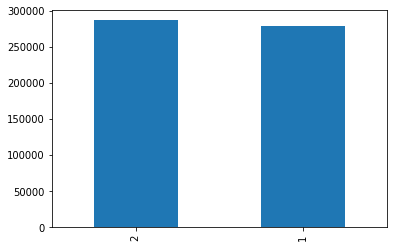

In [ ]:
dados['sex'].value_counts().plot.bar()

In [ ]:
dados['covid_res'].value_counts()

2    279035
1    220657
3     66910
Name: covid_res, dtype: int64

1: positivo<br>
2: negativo<br>
3: esperando resultado<br><br>

0: negativo<br>
1: positivo<br>
2:esperando resultado

In [ ]:
dados['covid_res'].replace([1, 2, 3], [1, 0, 2], inplace=True)

In [ ]:
dados['covid_res'].value_counts()

0    279035
1    220657
2     66910
Name: covid_res, dtype: int64

In [ ]:
lista = dados.columns

In [ ]:
lista

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [ ]:
# Visão geral dos dados
for i in range(19):
  print(dados[lista[i]].value_counts().to_frame())
  print("---------------")

      sex
2  287112
1  279490
---------------
   patient_type
1        444689
2        121913
---------------
    intubed
97   444689
2    111824
1      9965
99      124
---------------
    pneumonia
2      478416
1       88175
99         11
---------------
       age
30   14604
31   13911
36   13890
38   13847
37   13836
..     ...
118      1
117      1
116      1
115      1
111      1

[120 rows x 1 columns]
---------------
    pregnancy
97     287112
2      273840
1        4063
98       1587
---------------
    diabetes
2     493790
1      70831
98      1981
---------------
      copd
2   555723
1     9130
98    1749
---------------
    asthma
2   546824
1    18026
98    1752
---------------
    inmsupr
2    555644
1      8978
98     1980
---------------
    hypertension
2         472270
1          92508
98          1824
---------------
    other_disease
2          546920
1           17084
98           2598
---------------
    cardiovascular
2           552005
1            12775
98 

In [ ]:
# Intubado
dados = dados[dados['intubed']!=97]

Text(0.5, 1.0, 'Intubados')

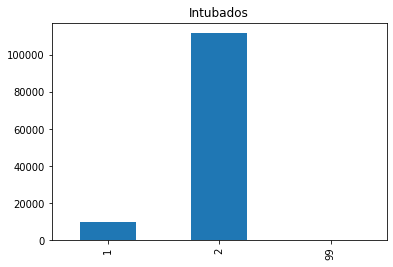

In [ ]:
dados['intubed'].value_counts().sort_index().plot.bar()
plt.title('Intubados')

In [ ]:
dados = dados[dados['intubed']!=99]

Text(0.5, 1.0, 'Intubados')

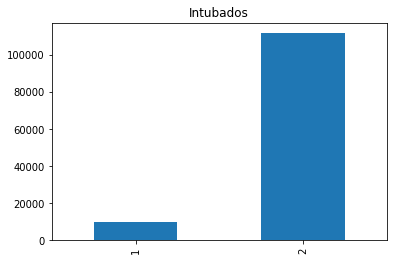

In [ ]:
dados['intubed'].value_counts().sort_index().plot.bar()
plt.title('Intubados')

Text(0.5, 1.0, 'Pneumonia')

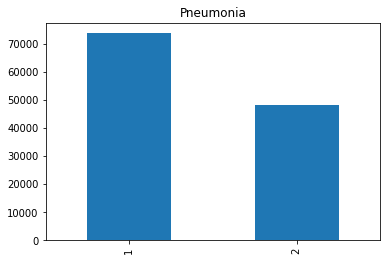

In [ ]:
# Pneumonia
dados = dados[dados['pneumonia']!=99]
dados['pneumonia'].value_counts().sort_index().plot.bar()
plt.title('Pneumonia')

In [ ]:
# Idade
dados = dados[dados['age']<100]
dados['age'].value_counts()

56    2905
52    2780
60    2734
61    2689
59    2671
      ... 
94      89
96      64
97      47
98      32
99      28
Name: age, Length: 100, dtype: int64

Text(0.5, 1.0, 'Gravidez')

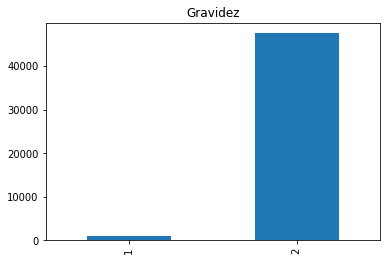

In [ ]:
# Gravidez
dados = dados[dados['pregnancy']!=97]
dados = dados[dados['pregnancy']!=98]
dados['pregnancy'].value_counts().sort_index().plot.bar()
plt.title('Gravidez')

Text(0.5, 1.0, 'Diabetes')

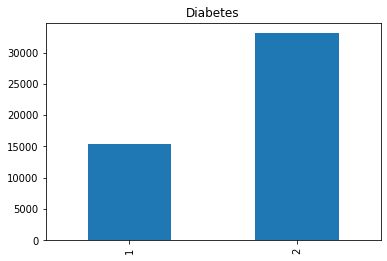

In [ ]:
# Diabetes
dados = dados[dados['diabetes']!=98]
dados['diabetes'].value_counts().sort_index().plot.bar()
plt.title('Diabetes')

Text(0.5, 1.0, 'COPD')

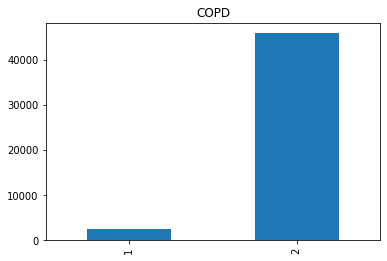

In [ ]:
# OCPD
dados = dados[dados['copd']!=98]
dados['copd'].value_counts().sort_index().plot.bar()
plt.title('COPD')

Text(0.5, 1.0, 'Asma')

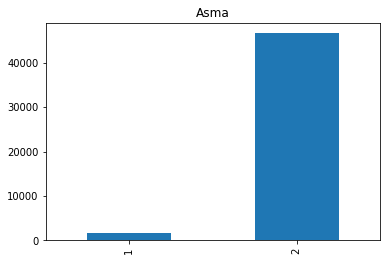

In [ ]:
# Asma
dados = dados[dados['asthma']!=98]
dados['asthma'].value_counts().sort_index().plot.bar()
plt.title('Asma')

Text(0.5, 1.0, 'INMSUPR')

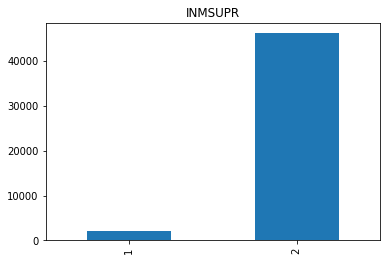

In [ ]:
dados = dados[dados['inmsupr']!=98]
dados['inmsupr'].value_counts().sort_index().plot.bar()
plt.title('INMSUPR')

Text(0.5, 1.0, 'Hipertensão')

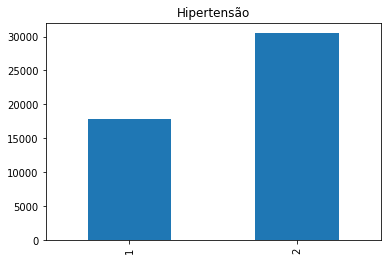

In [ ]:
dados = dados[dados['hypertension']!=98]
dados['hypertension'].value_counts().sort_index().plot.bar()
plt.title('Hipertensão')

Text(0.5, 1.0, 'Outras doenças')

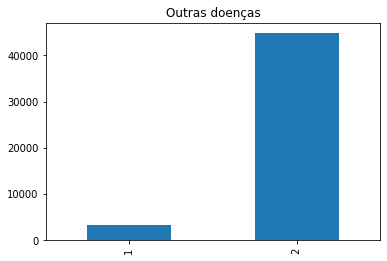

In [ ]:
dados = dados[dados['other_disease']!=98]
dados['other_disease'].value_counts().sort_index().plot.bar()
plt.title('Outras doenças')

Text(0.5, 1.0, 'Cardiovascular')

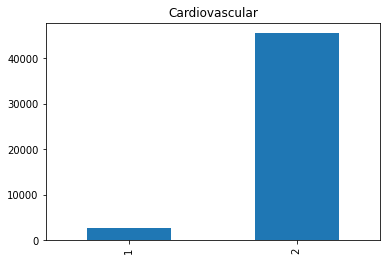

In [ ]:
dados = dados[dados['cardiovascular']!=98]
dados['cardiovascular'].value_counts().sort_index().plot.bar()
plt.title('Cardiovascular')

Text(0.5, 1.0, 'Obesidade')

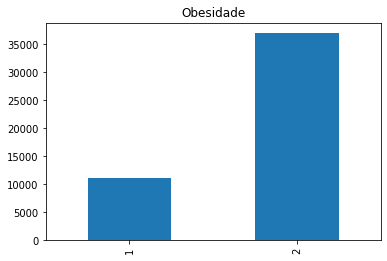

In [ ]:
dados = dados[dados['obesity']!=98]
dados['obesity'].value_counts().sort_index().plot.bar()
plt.title('Obesidade')

Text(0.5, 1.0, 'Crônico Renal')

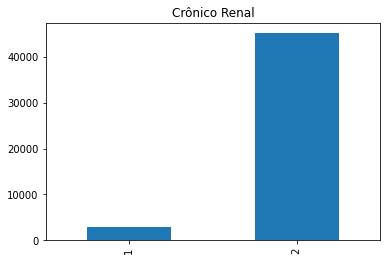

In [ ]:
dados = dados[dados['renal_chronic']!=98]
dados['renal_chronic'].value_counts().sort_index().plot.bar()
plt.title('Crônico Renal')

Text(0.5, 1.0, 'Tabaco')

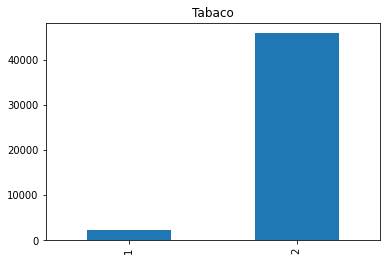

In [ ]:
dados = dados[dados['tobacco']!=98]
dados['tobacco'].value_counts().sort_index().plot.bar()
plt.title('Tabaco')

Text(0.5, 1.0, 'Contato com outras pessoas com covid')

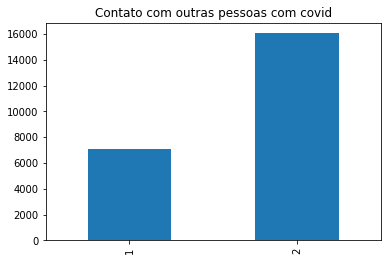

In [ ]:
dados = dados[dados['contact_other_covid']!=99]
dados['contact_other_covid'].value_counts().sort_index().plot.bar()
plt.title('Contato com outras pessoas com covid')

Text(0.5, 1.0, 'Tratamento Intensivo')

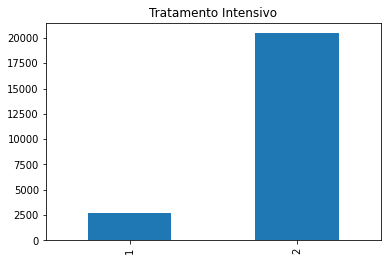

In [ ]:
dados = dados[dados['icu']!=97]
dados = dados[dados['icu']!=99]
dados['icu'].value_counts().sort_index().plot.bar()
plt.title('Tratamento Intensivo')

In [ ]:
dados

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2
30,1,2,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2
71,1,2,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,1,2
79,1,2,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2
93,1,2,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566497,1,2,2,1,62,2,2,2,2,2,2,2,1,2,2,2,1,2,2
566499,1,2,2,2,35,2,2,2,2,2,2,2,2,1,2,2,1,2,2
566543,1,2,2,1,57,2,2,2,2,2,1,2,2,1,2,2,2,2,2
566559,1,2,2,2,17,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
dados.reset_index(drop=True, inplace=True)

In [ ]:
dados.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2
1,1,2,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2
2,1,2,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,1,2
3,1,2,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2
4,1,2,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2


In [ ]:
y = dados['covid_res']

In [ ]:
X = dados[['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'icu']]

In [ ]:
X

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,2
1,1,2,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,2
2,1,2,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,2
3,1,2,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,2
4,1,2,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23138,1,2,2,1,62,2,2,2,2,2,2,2,1,2,2,2,1,2
23139,1,2,2,2,35,2,2,2,2,2,2,2,2,1,2,2,1,2
23140,1,2,2,1,57,2,2,2,2,2,1,2,2,1,2,2,2,2
23141,1,2,2,2,17,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23138    2
23139    2
23140    2
23141    2
23142    2
Name: covid_res, Length: 23143, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
for i in range(1, 25):
  modelo = DecisionTreeClassifier(criterion='gini', max_depth=i)
  modelo.fit(X_treino, y_treino)
  previsoes = modelo.predict(X_teste)
  precisao = metrics.accuracy_score(y_teste, previsoes)
  print(f'Precisão com densidade {i}: {precisao}')

Precisão com densidade 1: 0.5664698257237505
Precisão com densidade 2: 0.5664698257237505
Precisão com densidade 3: 0.5683422151807576
Precisão com densidade 4: 0.5729511738441596
Precisão com densidade 5: 0.5811608814633443
Precisão com densidade 6: 0.5788564021316434
Precisão com densidade 7: 0.5779922223822556
Precisão com densidade 8: 0.579144462048106
Precisão com densidade 9: 0.5821690911709636
Precisão com densidade 10: 0.5798646118392625
Precisão com densidade 11: 0.5762638628834797
Precisão com densidade 12: 0.5702146046377646
Precisão com densidade 13: 0.5622929569350424
Precisão com densidade 14: 0.561140717269192
Precisão com densidade 15: 0.5552354889817082
Precisão com densidade 16: 0.5532190695664698
Precisão com densidade 17: 0.5432810024485093
Precisão com densidade 18: 0.5421287627826588
Precisão com densidade 19: 0.5324787555811609
Precisão com densidade 20: 0.5267175572519084
Precisão com densidade 21: 0.5262854673772145
Precisão com densidade 22: 0.5202362091314994